In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [30]:
def f(x):
    '''defines the function to be integrated'''
    return x*2

# Prologue:

### The square integration method:

\begin{align*}
\int_{a}^{b}f(x)dx &= \sum_{i=0}^{N-1} \Delta x_i f(x_i) \\
\Delta x_i &= \frac{b-a}{N} \\
\int_{a}^{b}f(x)dx &= \frac{b-a}{N} [f(x_0) + f(x_1) + \dots + f(x_{N-1})] \\
\int_{a}^{b}f(x)dx &= \frac{b-a}{N} \sum_{i=0}^{N-1} f(x_i)
\end{align*}

In [31]:
def interval_maker_sq(a, b, N=10**3):
    '''makes x and y for y = f(x) using square method'''
    x = np.linspace(a, b, N)
    y = f(x)
    return x, y

In [33]:
def integral_sq(a, b, N=10**3):
    '''integrates the function f(x) from a to b using square method'''
    x, y = interval_maker_sq(a, b, N)
    integ = 0
    for i in range(1, len(x)-1):
        integ += (b - a)/N*(y[i])
    return integ

### The tarpezoidal integration method:

\begin{align*}
\int_{a}^{b}f(x)dx &= \frac{\Delta x}{2} [f(x_0) + 2 \sum^{N-1}_{i=1} f(x_i) + f(x_n)]  \\
\int_{a}^{b}f(x)dx &= \frac{b - a}{2 N} [f(x_0) + 2 \sum^{N-1}_{i=1} f(x_i) + f(x_n)]  \\
\end{align*}

In [70]:
def integral_tr(a, b, N=10**3):
    '''integrates the function f(x) from a to b using trapezoidal method'''
    x, y = interval_maker_sq(a, b, N)
    integ = 0
    for i in range(1, len(x)-1):
        integ += ((b - a)/N)*(y[i])
    integ += 0.5*((b - a)/N)*(y[0] + y[-1])
    return integ

###  The Simpson integration method:

\begin{align*}
\int_{a}^{b}f(x)dx &= \frac{\Delta x}{3} [f(x_0) + 4 \sum^{N-1}_{i=1, 3, 5} f(x_i) + 2 \sum^{N-2}_{i=2, 4, 6} f(x_i) +f(x_n)]  \\
\int_{a}^{b}f(x)dx &= \frac{b - a}{3 N} [f(x_0) + 4 \sum^{N-1}_{i=1, 3, 5} f(x_i) + 2 \sum^{N-2}_{i=2, 4, 6} f(x_i) +f(x_n)]  \\
\end{align*}

In [19]:
def integral_smp(a, b, N=10**3):
    '''integrates the function f(x) from a to b using simpson method'''
    x, y = interval_maker_sq(a, b, N)
    sum1 = 0
    sum2 = 0
    dx = (b - a)/N
    for i in range(1, len(x), 2):
        sum1 += dx*(y[i])
    sum1 *= 4/3
    for i in range(2, len(x)-1, 2):
        sum2 += dx*(y[i])
    sum2 *= 2/3
    integ = (dx/3)*(y[0] + y[-1]) + sum1 + sum2
    return integ

### Monte Carlo integration method:

In [94]:
def interval_maker_mc(a, b, N=10**3):
    '''makes x and y for y = f(x) using monte carlo method'''
    x = (b - a)*np.random.random_sample(N) + a
    y = f(x)
    return x, y

In [31]:
def integral_mc(a, b, N=10**3):
    '''integrates the function f(x) from a to b using monte carlo method'''
    x, y = interval_maker_mc(a, b, N)
    integ = 0
    for i in range(len(x)):
        integ += (b - a)/N*(y[i])
    return integ

In [96]:
integral_mc(0, 5, N=10**3)

please enter the value of z: 10


0.09419015741751907

In [12]:
l = [integral_mc(0, 5, i) for i in range(10**2, 10**4, 10**1)]
c = [25 for i in range(len(l))]

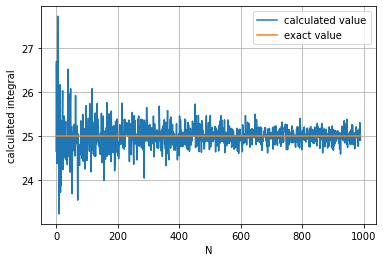

In [13]:
plt.plot(l)
plt.plot(c)
plt.ylabel('calculated integral')
plt.xlabel('N')
plt.grid()
plt.legend(['calculated value', 'exact value'])
plt.show();

# Question no. 1

\begin{align*}
dV &= \frac{1}{4 \pi \epsilon_0} \frac{dQ}{r} \\
&= \frac{1}{4 \pi \epsilon_0} \frac{\lambda(x) dx}{r} \\
&= \frac{1}{4 \pi \epsilon_0} \frac{\lambda(x) dx}{\sqrt{x^2 + z^2}} \\
V &= \frac{1}{4 \pi \epsilon_0} \int^{L}_{0} \frac{\lambda(x)dx}{\sqrt{x^2 + z^2}} \hspace{5mm}, \hspace{5mm} \lambda(x) = \frac{Q}{a} e^{- \frac{x^2}{a^2}} \\
V &= \frac{1}{4 \pi \epsilon_0} \frac{Q}{a} \int^{L}_{0} \frac{e^{- \frac{x^2}{a^2}}}{\sqrt{x^2 + z^2}} dx
\end{align*}

caclculating the potential using the square method yields:

(Please note that here we assume the value of $\frac{1}{4 \pi \epsilon_0}$, $Q$ and $a$ is set to be 1)

In [2]:
def f(x):
    '''function to be integrated'''
    z = int(input('please enter the value of z: '))
    f = np.exp(-x**2)/np.sqrt(x**2 + z**2)
    return f

In [3]:
def interval_maker_sq(a, b, N=10**3):
    '''makes x and y for y = f(x) using square method'''
    x = np.linspace(a, b, N)
    y = f(x)
    return x, y

In [13]:
def integral_tr(a, b, N=10**3):
    '''integrates the function f(x) from a to b using trapezoidal method'''
    x, y = interval_maker_sq(a, b, N)
    integ = 0
    for i in range(1, len(x)):
        integ += ((b - a)/N)*(y[i])
    integ += 0.5*((b - a)/N)*(y[0] + y[-1])
    return integ

In [17]:
def integral_smp(a, b, N=10**3):
    '''integrates the function f(x) from a to b using simpson method'''
    x, y = interval_maker_sq(a, b, N)
    sum1 = 0
    sum2 = 0
    dx = (b - a)/N
    for i in range(1, len(x), 2):
        sum1 += dx*(y[i])
    sum1 *= 4/3
    for i in range(2, len(x)-1, 2):
        sum2 += dx*(y[i])
    sum2 *= 2/3
    integ = (dx/3)*(y[0] + y[-1]) + sum1 + sum2
    return integ

In [14]:
L = float(input('please enter the length of the bar (L): '))
integ_tr = integral_tr(0, L)
print(f'Integral using the trapezoidal method is V = {integ_tr}')

please enter the length of the bar (L): 10
please enter the value of z: 3
Integral using the trapezoidal method is V = 0.28776034648950893


In [18]:
L = float(input('please enter the length of the bar (L): '))
integ_smp = integral_smp(0, L)
print(f'Integral using the square method is V = {integ_smp}')

please enter the length of the bar (L): 10
please enter the value of z: 3
Integral using the square method is V = 0.28776034648951


# Question no. 2

####  a)

In [31]:
def f(x):
    return 1

In [32]:
def interval_maker_mc(a, b, N=10**3):
    '''makes x and y for y = f(x) using monte carlo method'''
    r = np.random.random_sample(N)
    r_w = np.sqrt(2) * special.erfinv(1.17* np.sqrt(2/np.pi) * r)
    x = (b - a)*r_w + a
    y = f(x)
    return x, y

In [33]:
def integral_mc(a, b, N=10**3):
    '''integrates the function f(x) from a to b using monte carlo method'''
    x, y = interval_maker_mc(a, b, N)
    integ = 0
#     dx = (b - a)/N
    for i in range(len(x)):
        integ += ((b - a)/N)*y
    return integ

In [34]:
ans_a = [integral_mc(0, 1, N=i) for i in [10,100,1000]]

In [35]:
print(f'the integral using the monte carlo imporant sampling method for N = 10 is: I = {ans_a[0]}')
print(f'the integral using the monte carlo imporant sampling method for N = 100 is: I = {ans_a[1]}')
print(f'the integral using the monte carlo imporant sampling method for N = 1000 is: I = {ans_a[2]}')

the integral using the monte carlo imporant sampling method for N = 10 is: I = 0.9999999999999999
the integral using the monte carlo imporant sampling method for N = 100 is: I = 1.0000000000000007
the integral using the monte carlo imporant sampling method for N = 1000 is: I = 1.0000000000000007


#### b)

In [43]:
def f(x):
    return x**(-0.5)

In [44]:
def interval_maker_mc(a, b, N=10**3):
    '''makes x and y for y = f(x) using monte carlo method'''
    r = np.random.random_sample(N)
    r_w = -10*np.log(1 - 0.99*r)
    x = (b - a)*r_w + a
    y = f(x)
    return x, y

In [50]:
def integral_mc(a, b, N=10**3):
    '''integrates the function f(x) from a to b using monte carlo method'''
    x, y = interval_maker_mc(a, b, N)
    integ = 0
#     dx = (b - a)/N
    for i in range(len(x)):
        integ += ((b - a)/N)*y[i]
    return integ

In [70]:
ans_b = [integral_mc(0, 1, N=i) for i in [10,100,1000]]

In [71]:
print(f'the integral using the monte carlo imporant sampling method for N = 10 is: I = {ans_b[0]}')
print(f'the integral using the monte carlo imporant sampling method for N = 100 is: I = {ans_b[1]}')
print(f'the integral using the monte carlo imporant sampling method for N = 1000 is: I = {ans_b[2]}')

the integral using the monte carlo imporant sampling method for N = 10 is: I = 0.5159853958299221
the integral using the monte carlo imporant sampling method for N = 100 is: I = 0.573495735969134
the integral using the monte carlo imporant sampling method for N = 1000 is: I = 0.645491059270031


# Question no. 3

In [20]:
def f(x):
    return np.sqrt(1 - x**2)

In [21]:
def interval_maker_sq(a, b, N=10**3):
    x = np.linspace(a, b, N)
    y = f(x)
    return x, y

In [22]:
def integral_sq(a, b, N=10**3):
    x, y = interval_maker_sq(a, b, N)
    integ = 0
    for i in range(len(x)):
        integ += (b - a)/N*(y[i])
    return integ

In [23]:
def interval_maker_mc(a, b, N=10**3):
    x = (b - a)*np.random.random_sample(N) + a
    y = f(x)
    return x, y

In [24]:
def integral_mc(a, b, N=10**3):
    x, y = interval_maker_mc(a, b, N)
    integ = 0
    for i in range(len(x)):
        integ += (b - a)/N*(y[i])
    return integ

In [25]:
integ_sq = [integral_sq(-1, 1, N=i) for i in [100, 1000, 10000]]
integ_mc = [integral_mc(-1, 1, N=i) for i in [100, 1000, 10000]]

In [26]:
print(f'the integral using the square method for N = 100 is: I = {integ_sq[0]}')
print(f'the integral using the square method for N = 1000 is: I = {integ_sq[1]}')
print(f'the integral using the square method for N = 10000 is: I = {integ_sq[2]}')

the integral using the square method for N = 100 is: I = 1.5534179294048955
the integral using the square method for N = 1000 is: I = 1.5691729158636207
the integral using the square method for N = 10000 is: I = 1.570637583999452


In [27]:
print(f'the integral using the monte carlo method for N = 100 is: I = {integ_mc[0]}')
print(f'the integral using the monte carlo method for N = 1000 is: I = {integ_mc[1]}')
print(f'the integral using the monte carlo method for N = 10000 is: I = {integ_mc[2]}')

the integral using the monte carlo method for N = 100 is: I = 1.6285550071483064
the integral using the monte carlo method for N = 1000 is: I = 1.550582603802636
the integral using the monte carlo method for N = 10000 is: I = 1.5648420799338763
